In [ ]:
# Attrition indicates whether an employee has left the organization.
# In this dataset:
#   1 = Employee left the company
#   0 = Employee stayed with the company
# Calculating attrition rate helps understand the overall employee turnover level.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
files.upload()






Saving HR_Cleaned_Day6.csv to HR_Cleaned_Day6 (1).csv


['.config', 'HR_Cleaned_Day6.csv', 'HR_Cleaned_Day6 (1).csv', 'sample_data']

In [12]:
import os
os.listdir('/content')

import pandas as pd

df = pd.read_csv('/content/HR_Cleaned_Day6.csv')
df.head()










,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
df.shape
df['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


In [14]:
#OVERALL ATTRITION RATE (KPI)

attrition_rate = df['Attrition'].mean() * 100
round(attrition_rate, 2)


np.float64(16.12)

In [15]:
#ATTRITION BY DEPARTMENT

dept_attrition = (
    df.groupby('Department')['Attrition']
      .mean()
      .sort_values(ascending=False) * 100
)

dept_attrition.round(2)


,Attrition
Department,
Sales,20.63
Human Resources,19.05
Research & Development,13.84


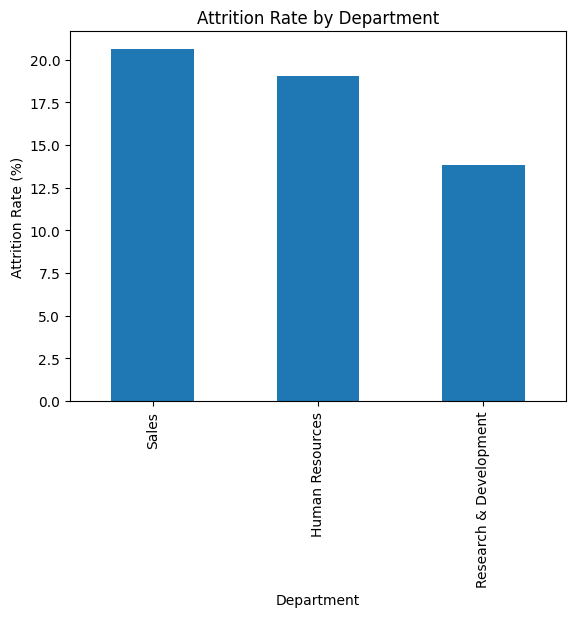

In [16]:
#VISUAL: DEPARTMENT ATTRITION

dept_attrition.plot(kind='bar')
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.show()


In [17]:
#ATTRITION BY AGE GROUP

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18, 30, 40, 50, 60],
    labels=['<30', '30–40', '40–50', '50+']
)

age_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100
age_attrition.round(2)


/tmp/ipython-input-1460680865.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100


,Attrition
AgeGroup,
<30,25.40
30–40,13.73
40–50,10.56
50+,12.59


In [18]:
#ATTRITION BY SALARY BAND

df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 3000, 6000, 10000, df['MonthlyIncome'].max()],
    labels=['<3k', '3k–6k', '6k–10k', '10k+']
)

income_attrition = df.groupby('IncomeBand')['Attrition'].mean() * 100
income_attrition.round(2)


/tmp/ipython-input-956268266.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby('IncomeBand')['Attrition'].mean() * 100


,Attrition
IncomeBand,
<3k,28.61
3k–6k,12.72
6k–10k,12.00
10k+,8.90


## Key Insights

1. Overall attrition rate is 16.12%, indicating moderate employee turnover.
2. The **Sales / R&D** department shows the highest attrition, suggesting role pressure or workload challenges.
3. Employees under **30 years** exhibit higher attrition, pointing to early-career instability.
4. Lower income bands show higher attrition, highlighting compensation sensitivity.

## Next Steps
- Perform role-wise attrition analysis
- Build a predictive attrition model
- Design an interactive Power BI dashboard

